# Freiraumausbreitung



In [4]:
import numpy as np
import matplotlib.pyplot as plt

minx, maxx = 0, 10
miny, maxy = -10, 10
stepsx, stepsy = 101, 101

t = np.linspace(minx, maxx, stepsx)
y = np.linspace(miny, maxy, stepsy)

X, Y = np.meshgrid(t, y)

In [6]:
#Komplexer Modulator
@np.vectorize
def m(t, f):
    a = lambda x: 0 if np.cos(x) > 0 else 1  # Amplitude
    a = np.vectorize(a)
    p = np.pi / 2  # phase
    f = f  # Frequenz
    return a(t) * np.exp(1j * 2 * np.pi * f * t + p)


# Annahme
@np.vectorize
def s(t, f=1):
    return np.real(np.exp(1j * 2 * np.pi * f * t) * m(t, f))


#komplexer Kanalkoeffizient
@np.vectorize
def h(t, f=1):
    #dämpfung
    d = 1 / 3
    #phase
    p = np.log(t)
    return np.exp(-t * d + p)


#Signal Verzögerung
tau = 2


@np.vectorize
def r(t, f=1):
    return s(t - tau, f) * h(t - tau, f)


#Auf Empfängerseite geschetztes M
@np.vectorize
def m_estimate(t, f):
    return r(t, f) * np.exp(-1j * 2 * np.pi * f * t) * h(t, f) ** -1





## Plots


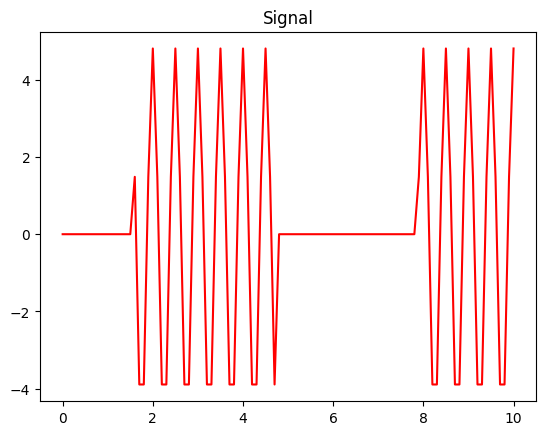

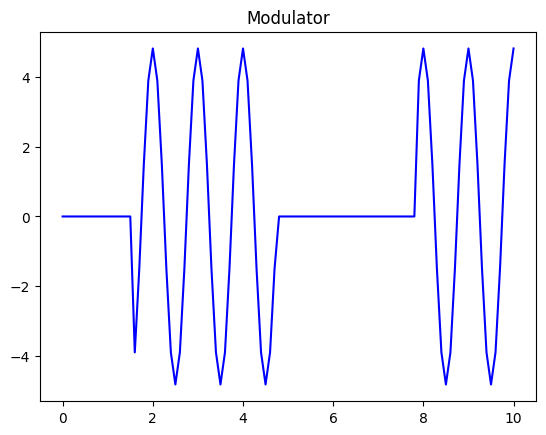

C:\Users\guita\AppData\Local\Temp\ipykernel_8292\1258196650.py:23: RuntimeWarning: divide by zero encountered in log
  p = np.log(t)


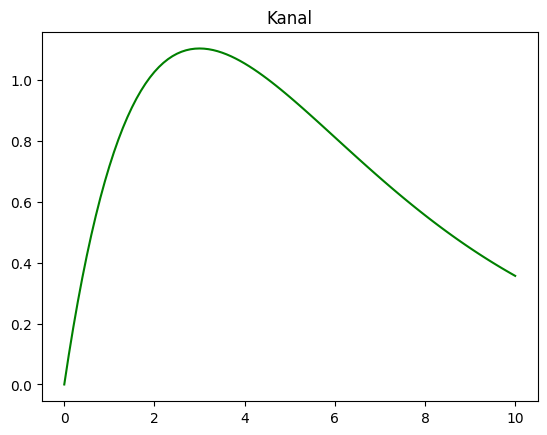

C:\Users\guita\AppData\Local\Temp\ipykernel_8292\1258196650.py:23: RuntimeWarning: invalid value encountered in log
  p = np.log(t)


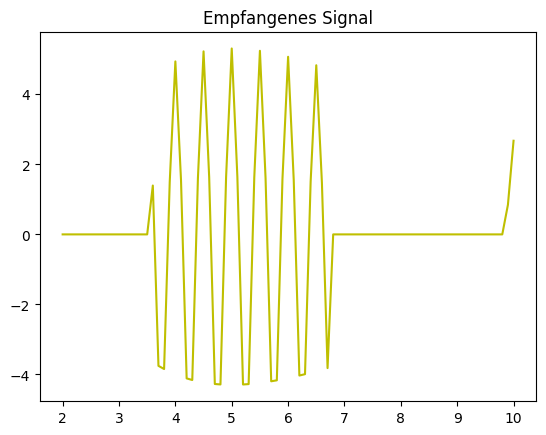

C:\Users\guita\AppData\Local\Temp\ipykernel_8292\1258196650.py:39: RuntimeWarning: divide by zero encountered in reciprocal
  return r(t, f) * np.exp(-1j * 2 * np.pi * f * t) * h(t, f) ** -1


Text(0.5, 1.0, 'Geschätztes Signal')

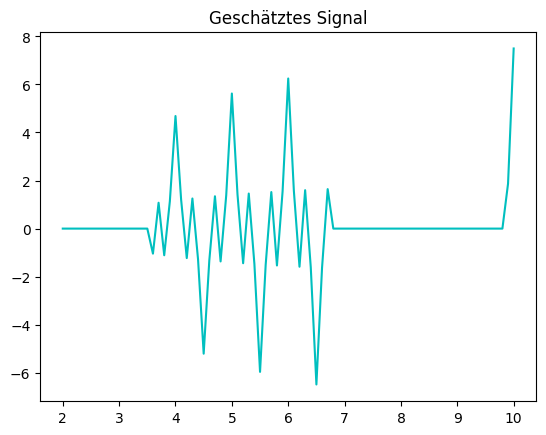

In [7]:

plt.plot(t, s(t), "r")
plt.title("Signal")
plt.show()

plt.plot(t, m(t, 1), "b")
plt.title("Modulator")
plt.show()

plt.plot(t, h(t), "g")
plt.title("Kanal")
plt.show()

plt.plot(t, r(t), "y")
plt.title("Empfangenes Signal")
plt.show()

plt.plot(t, m_estimate(t, 1), "c")
plt.title("Geschätztes Signal")




# Isotrope Antenne


In [ ]:
c = 3 * 10 ** 8  # speed of light

d = 10  # distance

@np.vectorize
def P_s():  #leistung
    return 1

def A(d):  #fläche
    return 4 * np.pi * d ** 2

@np.vectorize
def S(a, ps):  # leistungsdichte
    return ps / a

@np.vectorize
def P_r(s, a): # empfangsleistung, a ist die aufnahme fläche
    return s * a

@np.vectorize
def A_r(l):
    return (l ** 2) / (4 * np.pi)

@np.vectorize
def G_r(l):
    return 4 * np.pi * A_r(l)

@np.vectorize
def G_s(l):
    return 4 * np.pi * A(l)

@np.vectorize
def a_n(l, d):
    return (l / (4 * np.pi * d)) * np.sqrt(G_r(l)* G_s(l))
